In [1]:
%pylab inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torch.utils.data import TensorDataset
from torch.autograd import Variable
from torchvision import transforms
from torchvision.datasets import MNIST

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


L 100 100
L 100 100


(tensor([[ 0.0316,  0.9870],
         [ 2.1151, -0.0462],
         [ 0.8825, -0.0758],
         [-0.0551, -0.0373],
         [ 0.8295, -0.5393],
         [ 2.1129,  0.6621],
         [ 0.5697,  0.3374],
         [ 0.9522, -0.7531],
         [-0.0292,  0.3929],
         [ 1.7158,  0.3607],
         [-0.2788,  0.6142],
         [ 2.0034, -0.3091],
         [ 1.5001, -0.7464],
         [ 1.2254,  1.1979],
         [ 0.4673,  0.5470],
         [-0.3665,  1.1197],
         [ 0.3012,  1.2332],
         [ 0.3043,  0.8237],
         [-0.2371,  0.7788],
         [ 1.1634,  0.5529],
         [-0.5970,  0.6572],
         [ 0.4636, -0.1952],
         [ 0.6845,  0.7529],
         [ 0.7052, -0.4589],
         [-0.6581, -0.1294],
         [-0.7466, -0.3830],
         [ 0.6059,  0.3125],
         [ 2.1814, -0.0229],
         [ 1.9198,  0.1725],
         [ 1.4834, -0.1052],
         [ 0.4740, -0.1458],
         [ 1.0561, -1.0357],
         [ 1.8650, -0.0111],
         [ 0.4195, -0.3248],
         [ 0.0

(tensor([[ 0.0316,  0.9870],
         [ 2.1151, -0.0462],
         [ 0.8825, -0.0758],
         [-0.0551, -0.0373],
         [ 0.8295, -0.5393],
         [ 2.1129,  0.6621],
         [ 0.5697,  0.3374],
         [ 0.9522, -0.7531],
         [-0.0292,  0.3929],
         [ 1.7158,  0.3607],
         [-0.2788,  0.6142],
         [ 2.0034, -0.3091],
         [ 1.5001, -0.7464],
         [ 1.2254,  1.1979],
         [ 0.4673,  0.5470],
         [-0.3665,  1.1197],
         [ 0.3012,  1.2332],
         [ 0.3043,  0.8237],
         [-0.2371,  0.7788],
         [ 1.1634,  0.5529],
         [-0.5970,  0.6572],
         [ 0.4636, -0.1952],
         [ 0.6845,  0.7529],
         [ 0.7052, -0.4589],
         [-0.6581, -0.1294],
         [-0.7466, -0.3830],
         [ 0.6059,  0.3125],
         [ 2.1814, -0.0229],
         [ 1.9198,  0.1725],
         [ 1.4834, -0.1052],
         [ 0.4740, -0.1458],
         [ 1.0561, -1.0357],
         [ 1.8650, -0.0111],
         [ 0.4195, -0.3248],
         [ 0.0

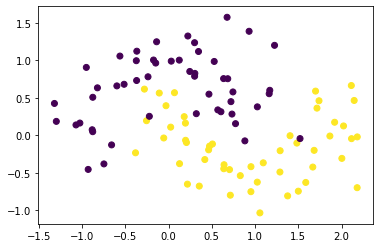

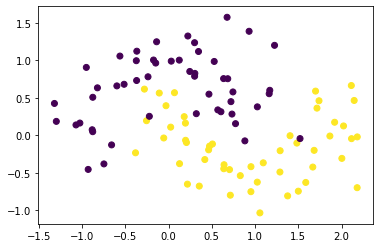

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.3, random_state=0)

import matplotlib.pyplot as plt
# plt.s
kw=dict(c=y)
plt.scatter(*list(zip(*X)), **kw)
# print(*list(zip(*X)))#, c=y)

# X
# sum(list(map(list, X)), [])
# train = [el for subl in X for el in subl], 
from operator import itemgetter
# train = map([lambda x: x*1.0], map(itemgetter(0), X)), y
# train = map(int, map(itemgetter(0), X)), y
# train = map(double, map(itemgetter(0), X)), y
_X = list(map(itemgetter(0), X))
print('L', len(_X), len(y))
# train = torch.from_numpy(np.array(_X)).type(torch.FloatTensor), torch.from_numpy(np.array(list(map(float, y)))).type(torch.FloatTensor)
train = torch.from_numpy(np.array(_X)).type(torch.FloatTensor), torch.from_numpy(y).type(torch.FloatTensor)
torch.from_numpy(np.array(X)).type(torch.FloatTensor), torch.from_numpy(y).type(torch.FloatTensor)

In [241]:
# train = MNIST('./data', train=True, download=True, transform=transforms.Compose([
#     transforms.ToTensor(), # ToTensor does min-max normalization. 
# ]), )

test = MNIST('./data', train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

# Create DataLoader
dataloader_args = dict(shuffle=True, batch_size=2,num_workers=1, pin_memory=True)
# train_loader = dataloader.DataLoader(train, **dataloader_args)
# train_loader = dataloader.DataLoader(train, **dataloader_args)
train_loader = dataloader.DataLoader(train, **dataloader_args)
test_loader = dataloader.DataLoader(test, **dataloader_args)

In [190]:


train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - Transformed Shape:', train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

AttributeError: 'tuple' object has no attribute 'train_data'

AttributeError: 'tuple' object has no attribute 'train_data'

In [239]:
class Model(nn.Module):
    def __init__(self, class_count):
        super(Model, self).__init__()
        
        self.class_count = class_count
        
#         self.fc1 = nn.Linear(784, 548)
        self.fc1 = nn.Linear(1, 548)
        self.bc1 = nn.BatchNorm1d(548)
        
        self.fc2 = nn.Linear(548, 252)
        self.bc2 = nn.BatchNorm1d(252)
        
        self.fc3 = nn.Linear(252, 1)
#         self.fc3 = nn.Linear(252, 1)
        
        
    def forward(self, x):
#         print('X1', '{', x, '}')
#         x = x.view((-1, 784))
        x = x.view((-1, 1))
#         print('X2', '{', x, '}')

        print('X0', len(x))
    
        h = self.fc1(x)
        h = self.bc1(h)
        h = F.relu(h)
        h = F.dropout(h, p=0.5, training=self.training)
        
        print('H1', len(h))
        
        h = self.fc2(h)
        h = self.bc2(h)
        h = F.relu(h)
        h = F.dropout(h, p=0.2, training=self.training)
        print('H2', len(h))
        h = self.fc3(h)
#         print('H', len(h))
        out = F.log_softmax(h)
        print('OUT', out)
        return out

model = Model(2)
#model.cuda() # CUDA!
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# train

model.train()

losses = []
# train_loader.type(torch.FloatTensor)
# display('TL', list(train_loader))

for epoch in range(10):
    for batch_idx, (data, target) in enumerate(train_loader):
        print('DATA1', len(data))
        print('TARGET1', len(target))
        # Get Samples
        data, target = Variable(data), Variable(target)
#         data['image'] = data['image'].type(dtype)
        
        # Init
        optimizer.zero_grad()

        # Predict
        print('DATA2', len(data))4
        print('TARGET2', len(target))
        y_pred = model(data) 

        display('L1', y_pred)
        display('L2', target)
        # Calculate loss
        loss = F.cross_entropy(y_pred, target)
        losses.append(loss.data.item())
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        
        # Display
        if batch_idx % 100 == 1:
            print('\r Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, 
                batch_idx * len(data), 
                len(train_loader.dataset),
                100. * batch_idx / len(train_loader), 
                loss.data.item()), 
                end='')
            
    print()
    

In [ ]:
plot(losses)

In [ ]:
evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor())).cpu()#.cuda()
evaluate_y = Variable(test_loader.dataset.test_labels).cpu()#.cuda()


output = model(evaluate_x)
pred = output.data.max(1)[1]
d = pred.eq(evaluate_y.data).cpu()
accuracy = d.sum()/d.size()[0]

print('Accuracy:', accuracy)
d